In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('fivethirtyeight')

In [23]:
from google.colab import files

files.upload()

Saving AAPL.csv to AAPL (1).csv


{'AAPL.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2015-12-07,29.745001,29.965000,29.452499,29.570000,27.173285,128336800\n2015-12-08,29.379999,29.650000,29.215000,29.557501,27.161795,137238000\n2015-12-09,29.410000,29.422501,28.770000,28.905001,26.562178,185445600\n2015-12-10,29.010000,29.235001,28.877501,29.042500,26.688534,116850800\n2015-12-11,28.797501,28.847500,28.212500,28.295000,26.001623,187544800\n2015-12-14,28.045000,28.170000,27.447500,28.120001,25.840809,257274800\n2015-12-15,27.985001,28.200001,27.587500,27.622499,25.383627,213292400\n2015-12-16,27.767500,27.997499,27.200001,27.834999,25.578905,224954000\n2015-12-17,28.004999,28.062500,27.245001,27.245001,25.036730,179091200\n2015-12-18,27.227501,27.379999,26.452499,26.507500,24.359007,385813200\n2015-12-21,26.820000,26.842501,26.392500,26.832500,24.657661,190362400\n2015-12-22,26.850000,26.930000,26.612499,26.807501,24.634689,131157600\n2015-12-23,26.817499,27.212500,26.799999,27.152500,24.951725,130629600\n2015-1

In [24]:
# Store the data into a dataframe and et data as index
df = pd.read_csv('AAPL.csv')
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

# Show data
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2015-12-07,2015-12-07,29.745001,29.965000,29.452499,29.570000,27.173285,128336800
2015-12-08,2015-12-08,29.379999,29.650000,29.215000,29.557501,27.161795,137238000
2015-12-09,2015-12-09,29.410000,29.422501,28.770000,28.905001,26.562178,185445600
2015-12-10,2015-12-10,29.010000,29.235001,28.877501,29.042500,26.688534,116850800
2015-12-11,2015-12-11,28.797501,28.847500,28.212500,28.295000,26.001623,187544800


In [25]:
# Create functions to calculate the Simple Moving Average (SMA), Exponential Moving Average (EMA)

def SMA(data, period=30, column='Close'):
  return data[column].rolling(window=period).mean()

def EMA(data, period=20, column='Close'):
  return data[column].ewm(span=period, adjust=False).mean()

In [26]:
# Calculate the Moving Average Convergence/Divergence (MACD)

def MACD(data, period_long=26, period_short=12, period_signal=9, column='Close'):
  # Short-term EMA
  ShortEMA = EMA(data=data, period=period_short, column=column)
  # Long-term EMA
  LongEMA = EMA(data=data, period=period_long, column=column)
  # Calculate MACD
  data['MACD'] = ShortEMA - LongEMA
  # calculate signal line
  data['Signal_Line'] = EMA(data=data, period=period_signal, column='MACD')

  return data

In [27]:
# Create function to compute Relative Strength Index (RSI)

def RSI(data, period=14, column='Close'):
  delta = data[column].diff(1)
  delta = delta[1:]
  up = delta.copy()
  down = delta.copy()
  up[up < 0] = 0
  down[down > 0] = 0
  data['up'] = up
  data['down'] = down
  average_gain = SMA(data=data, period=period, column='up')
  average_loss = abs(SMA(data=data, period=period, column='down'))
  rs = average_gain / average_loss
  rsi = 100.0 - (100.0/(1.0 + rs))

  data['RSI'] = rsi

  return data

In [28]:
# Create/add to dataset

MACD(df)
RSI(df)
df['SMA'] = SMA(df)
df['EMA'] = EMA(df)

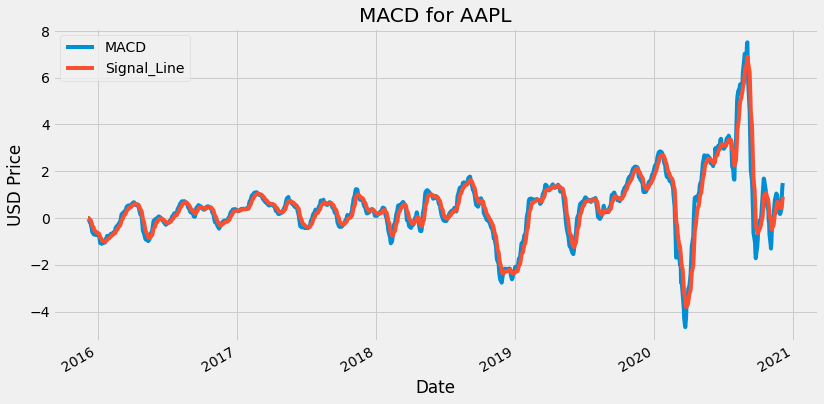

In [31]:
# Plot the chart

cols = ['MACD', 'Signal_Line']
df[cols].plot(figsize=(12.2, 6.4))
plt.title('MACD for AAPL')
plt.xlabel('Date')
plt.ylabel('USD Price')
plt.show()

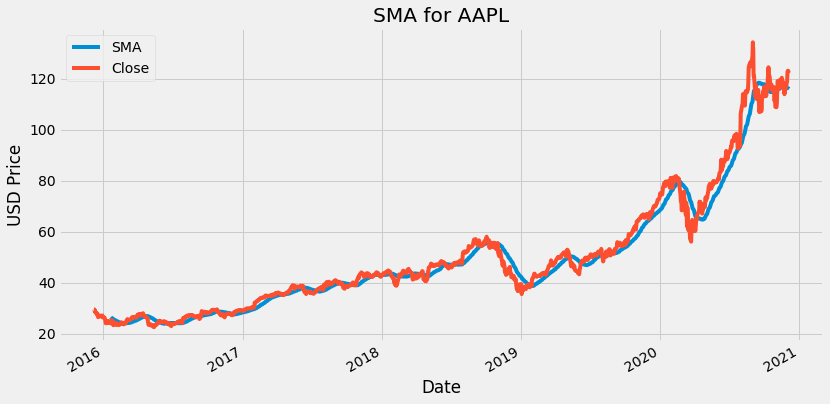

In [32]:
cols = ['SMA', 'Close']
df[cols].plot(figsize=(12.2, 6.4))
plt.title('SMA for AAPL')
plt.xlabel('Date')
plt.ylabel('USD Price')
plt.show()

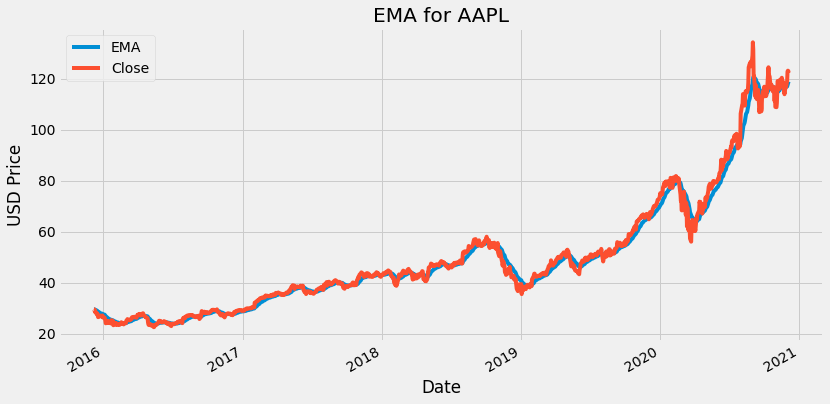

In [33]:
cols = ['EMA', 'Close']
df[cols].plot(figsize=(12.2, 6.4))
plt.title('EMA for AAPL')
plt.xlabel('Date')
plt.ylabel('USD Price')
plt.show()

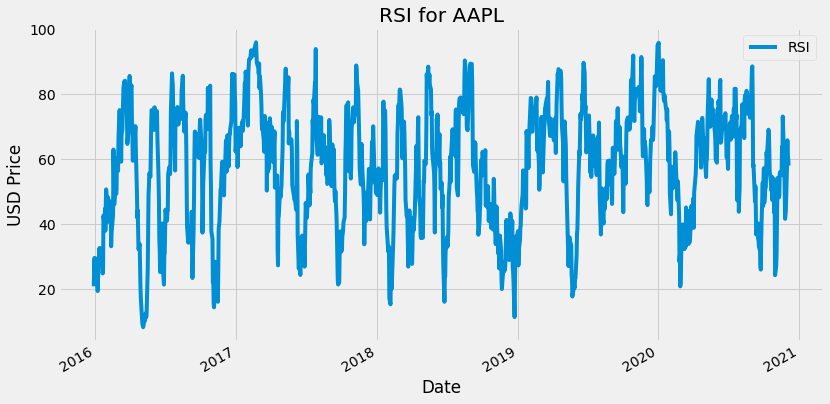

In [34]:
cols = ['RSI']
df[cols].plot(figsize=(12.2, 6.4))
plt.title('RSI for AAPL')
plt.xlabel('Date')
plt.ylabel('USD Price')
plt.show()